# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

*Diabetes Data Set*

Who ?
Public health professionals and epidemiologists studying diabetes trends in the U.S.

WHAT ?
To understand which lifestyle and behavioral indicators (e.g., BMI, physical activity, sleep, smoking) are most predictive of diabetes.
The goal is to identify at-risk groups for early intervention.

HOW ?
Bar charts for categorical comparisons (e.g., diabetes prevalence by sex or education level)
Box plots for BMI, sleep time, and age distribution
Logistic regression/ROC curves to show prediction strength
Feature importance plots from models like Random Forest

*Chronic Kidney Disease (CKD) Dataset*
WHO
Nephrologists, primary care physicians, and CKD screening program designers.
WHAT
To detect early signs of chronic kidney disease progression, and assess the impact of clinical indicators like blood pressure, serum creatinine, hemoglobin, and albumin levels.
HOW
    Line charts to track key biomarker trends
    Radar plots comparing normal vs. CKD patients
    Confusion matrix from classification models
    Correlation heatmap of medical variables

*Hypertension Risk Prediction Dataset*
WHO ?
Preventive care specialists, cardiologists, and lifestyle coaches.
WHAT ?
To examine how age, cholesterol, weight, glucose levels, and family history contribute to hypertension risk.
The focus is on uncovering modifiable behaviors that lower risk.
How ?
Histogram and density plots of age, weight, cholesterol
Scatter plots with blood pressure vs. other features
Decision trees or SHAP plots to explain model behavior
Cluster analysis to identify patient subtypes






# 3. Homework - work with your own data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [8]:
df_diabetes = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_ckd = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

print(df_ckd.columns)
categorical_cols = df_ckd.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

=== Diabetes Dataset Summary ===
       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000   

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

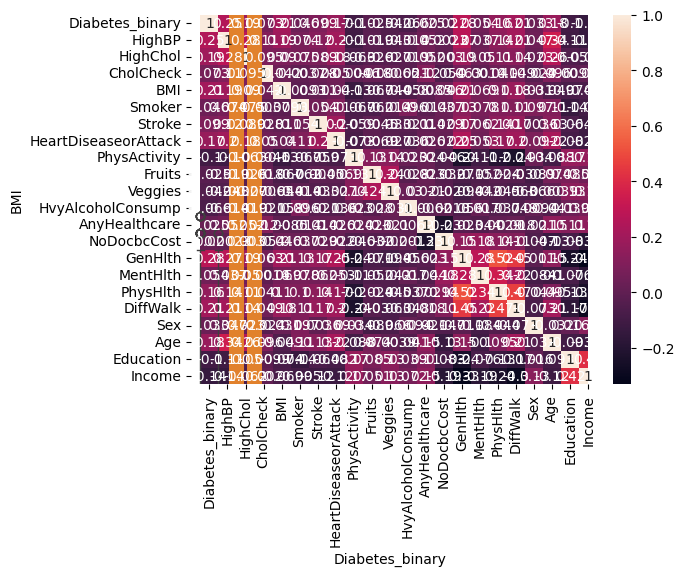

In [12]:
import pandas as pd

# Re-load the datasets


df_diabetes = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df_ckd = pd.read_csv("Chronic_Kidney_Dsease_data.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

# Generate basic summaries
diabetes_desc = df_diabetes.describe(include='all')
ckd_desc = df_ckd.describe(include='all')
hypertension_desc = df_hypertension.describe(include='all')

# Check for duplicates
diabetes_duplicates = df_diabetes.duplicated().sum()
ckd_duplicates = df_ckd.duplicated().sum()
hypertension_duplicates = df_hypertension.duplicated().sum()

# Check for nulls
diabetes_nulls = df_diabetes.isnull().sum()
ckd_nulls = df_ckd.isnull().sum()
hypertension_nulls = df_hypertension.isnull().sum()

# Display descriptive summaries

print("=== Diabetes Dataset Summary ===")
print(diabetes_desc)

print("\n=== CKD Dataset Summary ===")
print(ckd_desc)

print("\n=== Hypertension Dataset Summary ===")
print(hypertension_desc)

# Return duplicates and total null values per dataset
print("\n=== Duplicates in Each Dataset ===")
print(f"Diabetes: {diabetes_duplicates}")
print(f"CKD: {ckd_duplicates}")
print(f"Hypertension: {hypertension_duplicates}")

print("\n=== Total Null Values in Each Dataset ===")
print(f"Diabetes: {diabetes_nulls.sum()}")
print(f"CKD: {ckd_nulls.sum()}")
print(f"Hypertension: {hypertension_nulls.sum()}")


#Diabetes Dataset
#Duplicates: 24,206 rows — significant duplication, should be reviewed or removed
#Missing values: None
#Usability: Usable after deduplication

#Chronic Kidney Disease (CKD) Dataset
#Duplicates: None
#Missing values: None\
#Usability: Clean and ready for analysis

#Hypertension Dataset
#Duplicates: None
#Missing values: None
#Usability: Ready to use

# Steps to clean up Diabetes Dataset 
#Remove duplicates from the diabetes dataset: df_diabetes.drop_duplicates(inplace=True)
#Consider class balance checks (e.g., ratio of positive to negative labels)
#Identify categorical features and apply encoding (pd.get_dummies or OrdinalEncoder)
#Explore mode, median, and outliers for inconsistent data (e.g., age = 0)

#1 Remove Duplicates
df_diabetes.drop_duplicates(inplace=True)
#2 Handling any missing values
df_diabetes.fillna(df_diabetes.median(), inplace=True)  # For numeric columns
df_diabetes.fillna("Unknown", inplace=True)    # For categorical columns
#3Check for Inconsistencies
  #Negative ages or values outside expected range
  #Incorrect data types (e.g., numeric coded as string)
#4 Check for Class Imbalance

print(df_diabetes['Diabetes_binary'].value_counts(normalize=True))
print(df_hypertension['Hypertension'].value_counts(normalize=True))
#print(df_ckd['classification'].value_counts(normalize=True)) 

# Encode Categorical Variables
# One-hot encoding (for logistic regression, tree-based models)
df = pd.get_dummies(df_diabetes, drop_first=True)

# Or ordinal encoding if there is a natural order
print("Arun")
print(df_ckd.columns)
categorical_cols = df_ckd.select_dtypes(include=['object', 'category']).columns.tolist()
#print("Categorical columns:", categorical_cols)

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df_ckd[['DoctorInCharge']] = encoder.fit_transform(df_ckd[['DoctorInCharge']])

#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)  # Feature correlation
sns.boxplot(x='Diabetes_binary', y='BMI', data=df_diabetes)
sns.countplot(x='Hypertension', data=df_hypertension)




# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

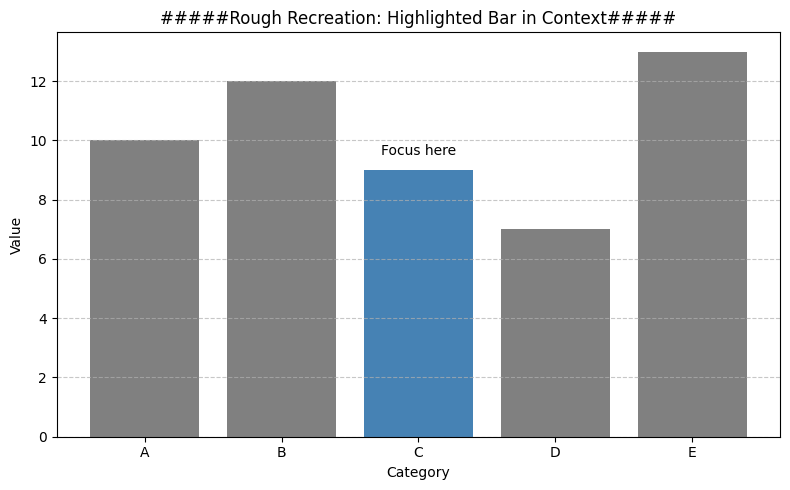

In [14]:


# Rough recreation of a bar chart with context from "Storytelling With Data"

# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [10, 12, 9, 7, 13]

# Highlight one bar (like in a focused data story)
colors = ['gray', 'gray', 'steelblue', 'gray', 'gray']

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=colors)

# Add annotation to the focused bar
plt.text('C', 9.5, 'Focus here', ha='center', fontsize=10)

# Add title and axis labels
plt.title('#####Rough Recreation: Highlighted Bar in Context#####')
plt.xlabel('Category')
plt.ylabel('Value')

# Add horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.tight_layout()
plt.show()